In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv('IPSF_INP_2024-07-01.csv')
df

<ipython-input-15-d9bba0cb6a2e>:1: DtypeWarning: Columns (7,9,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('IPSF_INP_2024-07-01.csv')


,oscarNumber,effectiveDate,fiscalYearBeginningDate,reportDate,terminationDate,waiverIndicator,intermediaryNumber,providerType,censusDivision,actualGeographicLocation_MSA,...,supplementalWageIndex,supplementalWageIndexFlag,changeCodeWageIndexReclassification,nationalProviderIdentifier,providerPpsPeriod,passThroughAmountForAllogenicStemCellAcquisition,lastUpdated,passThroughAmountForDirectGraduateMedicalEducation,passThroughAmountForKidneyAcquisition,passThroughAmountForN95
0,010001,19970101,19971001.0,20240701,NaN,N,11001,0,5,2180,...,NaN,,N,,NaN,0.0,19980514.0,0.0,0.0,0.0
1,010001,20090408,20080701.0,20240701,NaN,N,10111,0,5,2180,...,NaN,,N,1164403861,NaN,0.0,20090408.0,0.0,0.0,0.0
2,010001,20090807,20090701.0,20240701,NaN,N,10111,0,5,2180,...,NaN,,N,1164403861,NaN,0.0,20090804.0,0.0,0.0,0.0
3,010001,20091001,20090701.0,20240701,NaN,N,10111,0,5,2180,...,NaN,,N,1164403861,NaN,0.0,20090930.0,0.0,0.0,0.0
4,010001,20100408,20090701.0,20240701,NaN,N,10111,0,5,2180,...,NaN,,N,1164403861,NaN,0.0,20100408.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311233,800037,20131215,20131001.0,20240701,NaN,N,12001,00,3,21,...,NaN,,N,1477513273,NaN,0.0,20131211.0,0.0,0.0,0.0
311234,800037,20141001,20140701.0,20240701,NaN,N,12001,00,3,21,...,NaN,,N,1477513273,NaN,0.0,20141014.0,0.0,0.0,0.0
311235,800037,20151001,20150701.0,20240701,NaN,N,12001,00,3,21,...,NaN,,N,1477513273,NaN,0.0,20150928.0,0.0,0.0,0.0
311236,800037,20160816,20160701.0,20240701,NaN,N,12001,00,3,21,...,NaN,,N,1477513273,NaN,0.0,20160803.0,0.0,0.0,0.0


HCUP State Inpatient Databases (SID), sponsored by the Agency for Healthcare Research and Quality (AHRQ)

HCUP Hospital Market Structure File every 3 years

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Get the count of non-null values for each column
column_counts = df.count()

# Print the column counts
print("Column Counts:\n")
print(column_counts.to_markdown(numalign="left", stralign="left"))

Column Counts:

|                                                         | 0      |
|:--------------------------------------------------------|:-------|
| oscarNumber                                             | 311238 |
| effectiveDate                                           | 311238 |
| fiscalYearBeginningDate                                 | 306816 |
| reportDate                                              | 311238 |
| terminationDate                                         | 18692  |
| waiverIndicator                                         | 311238 |
| intermediaryNumber                                      | 311238 |
| providerType                                            | 311238 |
| censusDivision                                          | 311238 |
| actualGeographicLocation_MSA                            | 311238 |
| wageIndexLocation_MSA                                   | 311035 |
| standardizedAmountLocation_MSA                          | 309694 |
| soleCommunityOrM

This code demonstrates how to build a predictive model to forecast the pass-through amount for direct graduate medical education based on provider type, census division, and supplemental wage index.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
df = pd.read_csv('healthcare_providers.csv')

# Prepare the features and target
features = ['providerType', 'censusDivision', 'supplementalWageIndex']
target = 'passThroughAmountForDirectGraduateMedicalEducation'

# Encode categorical variables
df_encoded = pd.get_dummies(df[features + [target]])

# Split the data
X = df_encoded.drop(target, axis=1)
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
print(feature_importance.sort_values('importance', ascending=False).head(10))

FileNotFoundError: [Errno 2] No such file or directory: 'healthcare_providers.csv'

This code performs a clustering analysis on the healthcare providers based on financial metrics, which could reveal different segments or types of providers in the dataset.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('healthcare_providers.csv')

# Select features for clustering
features = ['supplementalWageIndex', 'passThroughAmountForDirectGraduateMedicalEducation',
            'passThroughAmountForKidneyAcquisition', 'passThroughAmountForN950']

# Prepare the data
X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Healthcare Provider Clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

# Analyze cluster characteristics
X['Cluster'] = clusters
cluster_means = X.groupby('Cluster').mean()
print(cluster_means)

In [ ]:
# Specify the directory and file name
output_dir = "D:\\Downloads\\AAA_CMS_Project"
output_file = "exported_data.csv"

# Export the DataFrame to a CSV file
column_counts.to_csv(f"{output_dir}\\{output_file}", index=False)  # Set index=False to exclude row numbers

In [ ]:
# Specify the directory and file name
output_dir = "D:\\Downloads\\AAA_CMS_Project"
output_file = "exported_data.xlsx"

# Export the DataFrame to an Excel file
column_counts.to_excel(f"{output_dir}\\{output_file}", index=False)

In [ ]:
column_counts.to_excel('output.xlsx', index=False)

In [ ]:
dataq1 = pd.read_excel('FY25.Final_Rule_PUF.20240715.cbsaoccmix_nooccmix_Results.xlsx')
dataq1

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,CBSAGEO,# of\nprovs in\nCBSAGEO,CBSAGEO unadjusted\nwages,CBSAGEO\nhours,CBSAGEO\nunadjusted\nAHW,CBSAGEO\nunadjusted\nwage\nindex,CBSAGEO occmix\nwages,CBSAGEO\noccmix\nAHW,CBSAGEO\noccmix\nwage\nindex,cbsarnsal,...,cbsanaoratspct,cbsamapct,cbsanursevar,cbsaallothervar,cbsaadjrnahw,cbsaadjlpnstahw,cbsaadjnaoratahw,cbsaadjmaahw,cbsaadjnurseahw,cbsanurseoccmixfactor
0,1,33,5.239857e+08,14713564,35.61,0.6471,5.253333e+08,35.70,0.6494,118607349.322,...,0.20371,0.01257,0.40999,0.59001,41.12,3.61,4.8,0.29,49.82,1.006423
1,2,2,1.454554e+08,2319561,62.71,1.1396,1.469032e+08,63.33,1.1521,33371753.8266,...,0.25535,0.034,0.35932,0.64068,40.51,1.4,6.02,0.79,48.72,1.029146
2,3,1,7.873835e+07,1637943,48.07,0.8735,7.870329e+07,48.05,0.8741,27594080,...,0.2259,0.00644,0.44539,0.55461,42.43,2.28,5.33,0.15,50.19,0.999004
3,4,18,6.523898e+08,16497963,39.54,0.7185,6.643444e+08,40.27,0.7326,209198140.2597,...,0.16683,0.0338,0.4882,0.5118,37.39,6.31,3.93,0.78,48.41,1.035736
4,5,9,6.980444e+08,10065710,69.35,1.2602,6.874922e+08,68.30,1.2425,220822247.62,...,0.11433,0.0616,0.45119,0.54881,44.13,3.27,2.7,1.42,51.52,0.973214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,49420,2,2.354178e+08,4693134,50.16,0.9115,2.432821e+08,51.84,0.9431,61165731,...,0.21686,0.11116,0.38617,0.61383,35.79,2.78,5.11,2.57,46.25,1.084108
461,49620,5,8.406645e+08,16086394,52.26,0.9497,8.528989e+08,53.02,0.9645,224781782.6263,...,0.2393,0.0414,0.42307,0.57693,39.67,2.19,5.64,0.96,48.46,1.034668
462,49660,4,4.627702e+08,10090807,45.86,0.8334,4.619616e+08,45.78,0.8328,168715318.67,...,0.21457,0.01905,0.46215,0.53785,42.8,2.02,5.06,0.44,50.32,0.996423
463,49700,2,2.490252e+08,3449218,72.20,1.3120,2.452894e+08,71.11,1.2936,101471191,...,0.16095,0.05703,0.5219,0.4781,45.48,1.02,3.8,1.32,51.62,0.971329


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FY25.Final_Rule_PUF.20240715.AHW_by_Provider_Area_Listing_Results.xlsx to FY25.Final_Rule_PUF.20240715.AHW_by_Provider_Area_Listing_Results.xlsx


In [ ]:
dataq2 = pd.read_excel('FY25.Final_Rule_PUF.20240715.AHW_by_Provider_Area_Listing_Results.xlsx')
dataq2

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,PROV,CBSAGEO,# of\nprovs in\nCBSAGEO,prov occmix\nwages,prov hour,prov\noccmix\nahw,CBSAGEO occmix\nwages,CBSAGEO\nhour,CBSAGEO\noccmix\nahw,CBSAGEO\noccmix\nwage\nindex
0,010001,20020,3,1.564388e+08,4278507,36.56,2.525723e+08,6931995,36.44,0.6629
1,010005,1,33,6.439399e+07,2067288,31.15,5.253333e+08,14713564,35.70,0.6494
2,010006,22520,3,7.795904e+07,1920748,40.59,1.484025e+08,3809853,38.95,0.7086
3,010007,1,33,1.132477e+07,361259,31.35,5.253333e+08,14713564,35.70,0.6494
4,010011,13820,12,1.311598e+08,2446183,53.62,1.782202e+09,40938299,43.53,0.7919
...,...,...,...,...,...,...,...,...,...,...
3095,670309,23104,29,3.678892e+07,740690,49.67,3.059487e+09,59016169,51.84,0.9431
3096,67B062,23104,29,3.894994e+06,81055,48.05,3.059487e+09,59016169,51.84,0.9431
3097,67B102,19124,51,3.197632e+06,77234,41.40,6.319740e+09,120045313,52.64,0.9576
3098,67B107,19124,51,3.130110e+06,66302,47.21,6.319740e+09,120045313,52.64,0.9576


 i indexes hospitals, j indexes payer category, Cij represents casemix variables, Hij are hospital characteristics, and Si are state characteristics that apply to every hospital in the state.

In [ ]:
df_cleaned = dataq1.dropna()
df_cleaned

,country,year,dem_ind,log_gdppc,log_pop,age_1,age_2,age_3,age_4,age_5,educ,age_median,code
38,Argentina,1965,0.530000,8.905374,9.933823,0.307737,0.241766,0.210866,0.151395,0.088237,4.988,26.799999,6
39,Argentina,1970,0.166667,9.016160,10.011580,0.302024,0.239600,0.207557,0.152852,0.097967,5.214,27.200001,6
40,Argentina,1975,0.833333,9.133990,10.084220,0.293686,0.245023,0.199240,0.154751,0.107299,5.876,27.400000,6
41,Argentina,1980,0.166667,9.202840,10.167740,0.292191,0.248464,0.190341,0.154945,0.114059,5.845,27.299999,6
42,Argentina,1985,0.833333,9.271142,10.243310,0.305165,0.237141,0.186167,0.152458,0.119069,6.618,27.200001,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,Zimbabwe,1980,0.666667,7.831994,8.716208,0.487388,0.249146,0.135395,0.081204,0.046867,2.147,15.600000,211
1365,Zimbabwe,1985,0.500000,7.876341,8.872487,0.490522,0.261934,0.124533,0.075827,0.047184,2.816,15.400000,211
1366,Zimbabwe,1990,0.166667,7.913739,9.061492,0.477027,0.272603,0.132026,0.073196,0.045149,2.828,16.000000,211
1367,Zimbabwe,1995,0.333333,7.977293,9.234155,0.462648,0.277990,0.141861,0.072411,0.045090,4.087,16.700001,211


In [ ]:
y = df_cleaned['log_gdppc']
y

38      8.905374
39      9.016160
40      9.133990
41      9.202840
42      9.271142
          ...   
1364    7.831994
1365    7.876341
1366    7.913739
1367    7.977293
1368    7.882274
Name: log_gdppc, Length: 679, dtype: float64

In [ ]:
x= df_cleaned.drop(columns=['log_gdppc','country'])
x

,year,dem_ind,log_pop,age_1,age_2,age_3,age_4,age_5,educ,age_median,code
38,1965,0.530000,9.933823,0.307737,0.241766,0.210866,0.151395,0.088237,4.988,26.799999,6
39,1970,0.166667,10.011580,0.302024,0.239600,0.207557,0.152852,0.097967,5.214,27.200001,6
40,1975,0.833333,10.084220,0.293686,0.245023,0.199240,0.154751,0.107299,5.876,27.400000,6
41,1980,0.166667,10.167740,0.292191,0.248464,0.190341,0.154945,0.114059,5.845,27.299999,6
42,1985,0.833333,10.243310,0.305165,0.237141,0.186167,0.152458,0.119069,6.618,27.200001,6
...,...,...,...,...,...,...,...,...,...,...,...
1364,1980,0.666667,8.716208,0.487388,0.249146,0.135395,0.081204,0.046867,2.147,15.600000,211
1365,1985,0.500000,8.872487,0.490522,0.261934,0.124533,0.075827,0.047184,2.816,15.400000,211
1366,1990,0.166667,9.061492,0.477027,0.272603,0.132026,0.073196,0.045149,2.828,16.000000,211
1367,1995,0.333333,9.234155,0.462648,0.277990,0.141861,0.072411,0.045090,4.087,16.700001,211


In [ ]:
# Splitting the DataFrame into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print("Training DataFrame Shape:")
print(x_train.shape)
print("\nTesting DataFrame Shape:")
print(x_test.shape)

Training DataFrame Shape:
(543, 11)

Testing DataFrame Shape:
(136, 11)


Ridge Regression

In [ ]:
X = np.array(x)
Y = np.array(y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.47891e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.47202e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.47165e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.48087e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

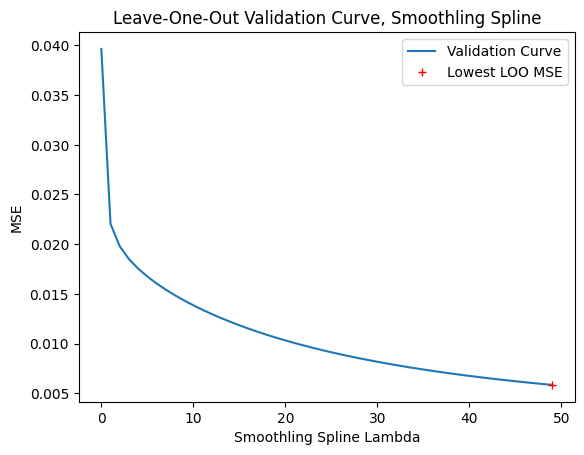

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

loo = LeaveOneOut() #cross validation
lambdas = np.arange(0, 50)
mse = []
for each in lambdas:
    total_mse = 0
    count = 0
    for train_index, test_index in loo.split(x):
      X_train , X_test = X[train_index],X[test_index]
      y_train , y_test = Y[train_index],Y[test_index]
      #print(X_train, y_train)
      # sp = splrep(X_train, y_train, s=each)
      # interpolate = splev(X_train, sp)
      # total_mse += (interpolate -y_test) ** 2
      Ridge_model = Ridge (alpha = each)
      Ridge_model.fit(X_train, y_train)
      y_pred = Ridge_model.predict(X_test)
      mse_value = mean_squared_error(y_test, y_pred)
      #count +=1
    mse.append(mse_value)
    #mse.append(np.mean(total_mse/count))
    #print("Lambda:", each, "MSE:", mse)
w_star = lambdas[np.argmin(mse)]
plt.plot(lambdas, mse, label='Validation Curve')
plt.plot(w_star, min(mse),'r+', label='Lowest LOO MSE')
plt.title('Leave-One-Out Validation Curve, Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

Lasso Regression

<ipython-input-62-36224040b910>:20: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  linear_modelLasso_model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.095e+01, tolerance: 6.877e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-62-362240

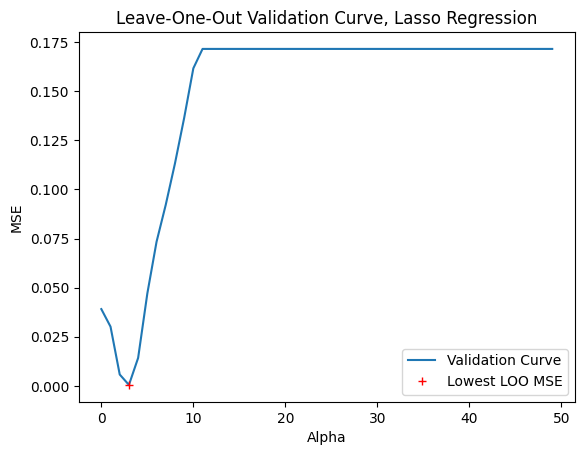

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

loo = LeaveOneOut() #cross validation
lambdas = np.arange(0, 50)
mse = []
for each in lambdas:
    total_mse = 0
    count = 0
    for train_index, test_index in loo.split(x):
      X_train , X_test = X[train_index],X[test_index]
      y_train , y_test = Y[train_index],Y[test_index]
      #print(X_train, y_train)
      # sp = splrep(X_train, y_train, s=each)
      # interpolate = splev(X_train, sp)
      # total_mse += (interpolate -y_test) ** 2
      linear_modelLasso_model = Lasso(alpha = each)
      linear_modelLasso_model.fit(X_train, y_train)
      y_pred = linear_modelLasso_model.predict(X_test)
      mse_value = mean_squared_error(y_test, y_pred)
      #count +=1
    mse.append(mse_value)
    #mse.append(np.mean(total_mse/count))
    #print("Lambda:", each, "MSE:", mse)
w_star = lambdas[np.argmin(mse)]
plt.plot(lambdas, mse, label='Validation Curve')
plt.plot(w_star, min(mse),'r+', label='Lowest LOO MSE')
plt.title('Leave-One-Out Validation Curve, Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

Adaptive Lasso Regression

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.371e+01, tolerance: 4.734e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-65-426c37392193>:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  Adaptive.fit(x_w, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

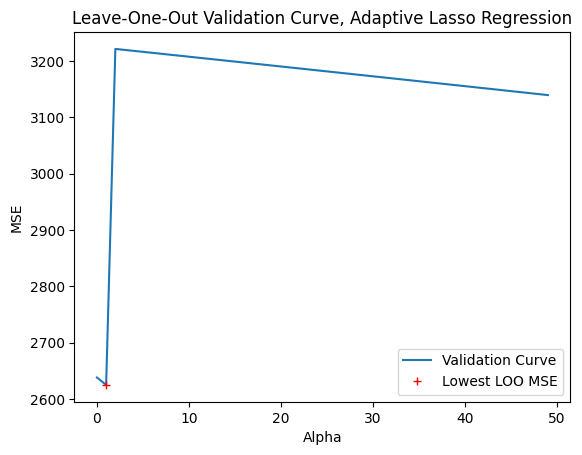

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

gprime = lambda w: 1. / (2. * np.sqrt(np.abs(w)) + np.finfo(float).eps)


def Adaptive_lasso_Regression (X_train, y_train,alpha,weights):
  for lassos in range(5):
    x_w = X_train/ weights[np.newaxis, :]
    Adaptive = Lasso(alpha=alpha, fit_intercept = False)
    Adaptive.fit(x_w, y_train)
    coef_ = Adaptive.coef_ / weights
    weights = gprime(coef_)
  return weights, Adaptive


loo = LeaveOneOut() #cross validation
lambdas = np.arange(0, 50)
mse = []

for each in lambdas:
    weights = np.ones(11)
    for train_index, test_index in loo.split(x):
      X_train , X_test = X[train_index],X[test_index]
      y_train , y_test = Y[train_index],Y[test_index]
      weights, Adaptive_lasso_Regression_model = Adaptive_lasso_Regression(X_train, y_train,each, weights)
      y_pred = Adaptive_lasso_Regression_model.predict(X_test)
      mse_value = mean_squared_error(y_test, y_pred)
    mse.append(mse_value)
w_star = lambdas[np.argmin(mse)]
plt.plot(lambdas, mse, label='Validation Curve')
plt.plot(w_star, min(mse),'r+', label='Lowest LOO MSE')
plt.title('Leave-One-Out Validation Curve, Adaptive Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

Elastic Net Regression

In [ ]:
import matplotlib.pyplot as plt
#import tensorly as tl
from itertools import product
import numpy as np
#import tensorly.decomposition as decomp


In [ ]:
from google.colab import files

uploaded = files.upload()  # This prompts the user to upload a file

# Get the filename from the uploaded dictionary
filename = list(uploaded.keys())[0]

# Print a message to confirm the upload
print(f"Uploaded file: {filename}")

# You can now access the uploaded file using its filename
# For example, to read the content of a text file:
# with open(filename, 'r') as f:
#   content = f.read()
#   print(content)

Saving NSC-1.mat to NSC-1.mat
Uploaded file: NSC-1.mat


In [ ]:
#NSC_1
import scipy.io
matNSC_1 = scipy.io.loadmat(filename)
matNSC_1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Mar 14 17:40:38 2019',
 '__version__': '1.0',
 '__globals__': [],
 'x': array([[array([[455.35787921, 457.51657608, 459.29537568, ..., 588.33667472,
                 586.69492266, 585.13879165],
                [472.61933566, 472.58584537, 472.60600376, ..., 590.59828541,
                 588.82725514, 586.82689656],
                [469.55513976, 470.57344794, 471.65391202, ..., 592.2983796 ,
                 589.71089604, 586.80250335],
                ...,
                [451.23039363, 452.62110464, 453.9753907 , ..., 581.73702318,
                 579.25136814, 576.73457577],
                [451.10569404, 452.41951979, 453.46354215, ..., 570.40959108,
                 567.93227375, 565.07095198],
                [448.30352974, 450.45672812, 452.12197947, ..., 574.68381151,
                 571.8765674 , 568.81760545]])                               ,
         array([[1584.85959183, 1584.33799979, 1583.873930

In [ ]:
import scipy.io
import pandas as pd
import numpy as np

mat = scipy.io.loadmat('NSC-1.mat')

print("Keys: ", mat.keys())

sensor_data = mat['x'][0]
target_data = mat['y']

flattened_sensor_data = [arr.flatten() for arr in sensor_data]
sensor_data_combined = np.column_stack(flattened_sensor_data)

print("Shape of combined sensor data: ", sensor_data_combined.shape)
print("Shape of target data: ", target_data.shape)

target_data_aligned = target_data.flatten()[:sensor_data_combined.shape[0]].reshape(-1, 1)

print("Shape of target data after reshaping: ", target_data_aligned.shape)

data_combined = np.hstack((sensor_data_combined, target_data_aligned))

num_sensors = sensor_data_combined.shape[1]
columns = [f'Sensor {i+1}' for i in range(num_sensors)] + ['Target']

df_Train = pd.DataFrame(data_combined, columns = columns)

print(df_Train.head())


Keys:  dict_keys(['__header__', '__version__', '__globals__', 'x', 'y'])
Shape of combined sensor data:  (30450, 10)
Shape of target data:  (150, 203)
Shape of target data after reshaping:  (30450, 1)
     Sensor 1     Sensor 2   Sensor 3    Sensor 4    Sensor 5   Sensor 6  \
0  455.357879  1584.859592  26.113280  154.125094  153.448275  34.051648   
1  457.516576  1584.338000  26.471596  152.963614  153.555526  34.316301   
2  459.295376  1583.873931  26.459327  151.811066  153.688154  34.560732   
3  460.966568  1583.507233  26.586496  151.082810  153.709778  34.921044   
4  462.272565  1583.083027  26.587104  150.275454  154.065490  35.324061   

   Sensor 7     Sensor 8   Sensor 9  Sensor 10    Target  
0 -1.637387  1574.359400  27.608475  85.981944  0.953586  
1 -1.894562  1573.619600  27.573746  86.081858  0.961709  
2 -2.213081  1573.521169  27.395048  86.204591  0.967366  
3 -2.040889  1573.328548  27.261211  86.093962  0.971069  
4 -2.113650  1572.716266  27.399564  85.839602 

In [ ]:
from google.colab import files

uploaded = files.upload()  # This prompts the user to upload a file

# Get the filename from the uploaded dictionary
filename = list(uploaded.keys())[0]

# Print a message to confirm the upload
print(f"Uploaded file: {filename}")

# You can now access the uploaded file using its filename
# For example, to read the content of a text file:
# with open(filename, 'r') as f:
#   content = f.read()
#   print(content)

Saving NSC-1.test.mat to NSC-1.test.mat
Uploaded file: NSC-1.test.mat


In [ ]:
import scipy.io
import pandas as pd
import numpy as np

mat = scipy.io.loadmat('NSC-1.test.mat')

print("Keys: ", mat.keys())

sensor_data = mat['x_test'][0]
target_data = mat['y_test']

flattened_sensor_data = [arr.flatten() for arr in sensor_data]
sensor_data_combined = np.column_stack(flattened_sensor_data)

print("Shape of combined sensor data: ", sensor_data_combined.shape)
print("Shape of target data: ", target_data.shape)

target_data_aligned = target_data.flatten()[:sensor_data_combined.shape[0]].reshape(-1, 1)

print("Shape of target data after reshaping: ", target_data_aligned.shape)

data_combined = np.hstack((sensor_data_combined, target_data_aligned))

num_sensors = sensor_data_combined.shape[1]
columns = [f'Sensor {i+1}' for i in range(num_sensors)] + ['Target']

df_Test = pd.DataFrame(data_combined, columns = columns)

print(df_Test.head())


Keys:  dict_keys(['__header__', '__version__', '__globals__', 'x_test', 'y_test'])
Shape of combined sensor data:  (10150, 10)
Shape of target data:  (50, 203)
Shape of target data after reshaping:  (10150, 1)
     Sensor 1     Sensor 2   Sensor 3    Sensor 4    Sensor 5   Sensor 6  \
0  447.689922  1579.780983  29.071273  171.170680  158.308026  29.413606   
1  449.598365  1579.442595  28.744503  169.379657  158.249633  29.401811   
2  451.552741  1579.000558  28.787026  167.240347  157.774014  29.594474   
3  453.160206  1578.707629  29.235253  165.435231  157.480912  29.578624   
4  454.371637  1578.017419  29.586222  163.402902  157.621797  29.493174   

   Sensor 7     Sensor 8   Sensor 9  Sensor 10    Target  
0 -5.285849  1586.431740  31.175524  80.506913  0.950936  
1 -5.350119  1586.223916  30.676153  80.855061  0.958381  
2 -5.610159  1585.891012  30.477026  80.783575  0.961925  
3 -6.085457  1585.676565  30.161384  80.686873  0.962493  
4 -6.389392  1585.302406  30.420751  8